<a href="https://colab.research.google.com/github/A-Wpro/Unsupervised_clustering_PCA_Kmeans_DBscan/blob/main/IrisUnsupClustering_PCA%26Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K_means on Iris data set with weak auto choosing of cluster numbers

In [ ]:
# Import 
from sklearn import datasets,cluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
# Load data
iris= datasets.load_iris()


best score of cluster is  2


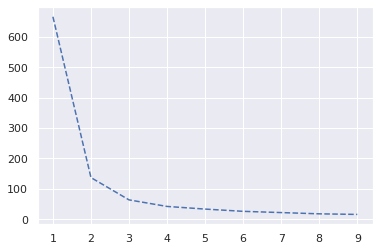

In [ ]:
pca = PCA(n_components=2)
irisDataDim2 = pca.fit_transform(iris.data)

def k_means_Fnc(k,df):
  k_means = cluster.KMeans(k)
  # fit data
  k_means.fit(df)
  return -k_means.score(df) , k_means

k=1
scoreTab = []
# How many cluster ? 
while k != 10:
  score, k_means = k_means_Fnc(k,irisDataDim2)
  scoreTab.append(score)
  k=k+1

plt.plot(np.arange(1,10),scoreTab,'--')

dif = 1
index = 1
best_index = 1
for score in range(len(scoreTab)-1):
  buffer = scoreTab[score]-scoreTab[score+1]
  if buffer > dif:
    dif = buffer
    best_index = index
  index = index + 1 

best_index= best_index + 1 
print("best score of cluster is ", best_index)

score, k_means = k_means_Fnc(2,irisDataDim2)


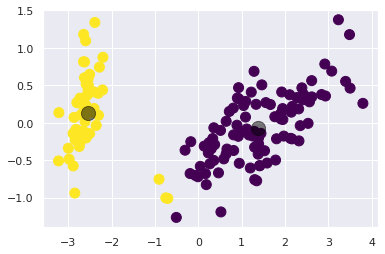

In [ ]:
y_kmeans = k_means.predict(irisDataDim2)
plt.scatter(irisDataDim2[:, 0], irisDataDim2[:, 1], c=y_kmeans, s=100, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Same but with DB scan 

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 0.579
Completeness: 1.000
V-measure: 0.734
Adjusted Rand Index: 0.568
Adjusted Mutual Information: 0.732
Silhouette Coefficient: 0.711


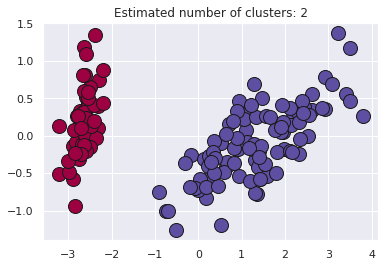

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


# Compute DBSCAN
db = DBSCAN(eps=1.3, min_samples=5).fit(irisDataDim2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(iris.target, labels))
print("Completeness: %0.3f" % metrics.completeness_score(iris.target, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(iris.target, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(iris.target, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(iris.target, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(irisDataDim2, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = irisDataDim2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = irisDataDim2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()